In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import PIL
from io import BytesIO
from IPython.display import clear_output, Image as NoteImage, display
# from pycaret.regression import setup, compare_models,evaluate_model ,  predict_model,  save_model, load_model

In [2]:
# pip install pycaret[full]

In [3]:
%matplotlib notebook
def imshow(im,fmt='jpeg'):
    #a = np.uint8(np.clip(im, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(im).save(f, fmt)
    display(NoteImage(data=f.getvalue()))
def imread(filename):
    img = cv.imread(filename)

    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

In [4]:
data=pd.read_csv("Fall 2019 Plumes detected by AVIRIS-NG and GAO provided by NASA-JPL and U.Arizona.csv")
data

,source_id,plume_lat,plume_lon,plume_candidate_id,date_of_detection,time_of_detection,source_type,source_type_label,ipcc,qplume,sigma_qplume,active_flare,inactive_flare,Operator_Alias,imageurl
0,P00156,32.283447,-103.741815,ang20190922t192642-A,9/23/2019,7:26:42 PM,compressor,Midstream,1B2 Oil & Natural Gas,296.676732,98.755811,False,False,DCP MIDSTREAM PARTNERS,https://edf-permian-data.s3.amazonaws.com/imag...
1,P00119,32.244361,-103.711379,ang20190922t192642-B,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,640.968143,190.138173,False,False,DEVON ENERGY PRODUCTION CO,https://edf-permian-data.s3.amazonaws.com/imag...
2,P00475,32.166625,-103.685468,ang20190922t194340-A,9/23/2019,7:43:40 PM,tank,Production,1B2 Oil & Natural Gas,1091.242729,310.028504,False,False,DEVON ENERGY PRODUCTION CO,https://edf-permian-data.s3.amazonaws.com/imag...
3,P00002,32.200072,-103.673301,ang20190922t192642-4,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,420.725207,147.155782,False,False,ENLINK,https://edf-permian-data.s3.amazonaws.com/imag...
4,P00003,32.116008,-103.626345,ang20190922t192642-5,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,1051.909600,339.267587,False,False,EOG RESOURCES INC,https://edf-permian-data.s3.amazonaws.com/imag...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,P01769,31.478768,-102.958800,GAO20191103t163539p0000-C,11/4/2019,4:35:39 PM,compressor,Midstream,1B2 Oil & Natural Gas,159.291858,64.873698,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...
3063,P01784,32.793745,-104.123650,GAO20191103t181042p0000-A,11/4/2019,6:10:42 PM,pipeline,Midstream,1B2 Oil & Natural Gas,250.722494,51.888206,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...
3064,P01784,32.793674,-104.123290,GAO20191103t182306p0000-B,11/4/2019,6:23:06 PM,pipeline,Midstream,1B2 Oil & Natural Gas,298.184474,68.096895,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...
3065,P01786,32.795682,-104.163570,GAO20191103t182306p0000-C,11/4/2019,6:23:06 PM,pipeline,Midstream,1B2 Oil & Natural Gas,200.567906,36.274204,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...


In [5]:
def flare_extractor(img):
#     img=imread("ang20190922t192642-A.png")
    x,y,c=img.shape
    real_img=np.zeros((x,y,c))
    red=img[:,:,0]
    green=img[:,:,1]
    blue=img[:,:,2]
    only_blue_carbon=np.uint8(blue>220)*np.uint8(green<120)*np.uint8(red<120)
    only_blue_carbon_sum=np.sum(only_blue_carbon)
#     imshow(only_blue_carbon)
    only_green_carbon=np.uint8(blue<150)*np.uint8(green>150)*np.uint8(red<150)
#     imshow(only_green_carbon)
    only_green_carbon_sum=np.sum(only_green_carbon)
    only_red_carbon=np.uint8(blue<120)*np.uint8(green<120)*np.uint8(red>220)
    only_red_carbon_sum=np.sum(only_red_carbon)
    only_yellow_carbon=np.uint8(blue<120)*np.uint8(green>220)*np.uint8(red>220)*255

#     imshow(only_red_carbon)
    real_img[:,:,0]=only_red_carbon*255
    real_img[:,:,1]=only_green_carbon*255
    real_img[:,:,2]=only_blue_carbon*255
    # real_img[:,:,0]=only_red_carbon+only_yellow_carbon
    # real_img[:,:,0]=only_green_carbon+only_yellow_carbon
    out=np.uint8(real_img)
    # imshow(out)
    # print(out)
    return out,only_red_carbon_sum, only_green_carbon_sum, only_blue_carbon_sum

In [6]:
def flare_extractor(img):
#     img=imread("ang20190922t192642-A.png")
    x,y,c=img.shape
    real_img=np.zeros((x,y,c))
    red=img[:,:,0]
    green=img[:,:,1]
    blue=img[:,:,2]
    only_blue_carbon=np.uint8(blue>150)*np.uint8(green<120)*np.uint8(red<120)
    only_blue_carbon_sum=np.sum(only_blue_carbon)
#     imshow(only_blue_carbon)
    only_green_carbon=np.uint8(blue<120)*np.uint8(green>150)*np.uint8(red<120)
#     imshow(only_green_carbon)
    only_green_carbon_sum=np.sum(only_green_carbon)
    only_red_carbon=np.uint8(blue<120)*np.uint8(green<120)*np.uint8(red>150)
    only_red_carbon_sum=np.sum(only_red_carbon)
    only_yellow_carbon=np.uint8(blue<120)*np.uint8(green>180)*np.uint8(red>180)
    only_yellow_carbon_sum=np.sum(only_yellow_carbon)
#     imshow(only_red_carbon)
#     real_img[:,:,0]=only_red_carbon*255
    
#     real_img[:,:,1]=only_green_carbon*255
#     real_img[:,:,2]=only_blue_carbon*255
    real_img[:,:,0]=np.logical_xor(only_red_carbon,only_yellow_carbon)*255

    real_img[:,:,1]=np.logical_xor(only_green_carbon,only_yellow_carbon)*255
    real_img[:,:,2]=only_blue_carbon*255
    # real_img[:,:,0]=only_red_carbon+only_yellow_carbon
    # real_img[:,:,0]=only_green_carbon+only_yellow_carbon
    out=np.uint8(real_img)
    # imshow(out)
    # print(out)
    
    return out,only_red_carbon_sum, only_green_carbon_sum, only_blue_carbon_sum,only_yellow_carbon_sum

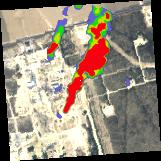

In [7]:
image=imread("images/processing-87.png")
imshow(image)

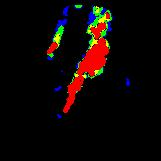

In [8]:
extracted_image,r,g,b,y=flare_extractor(image)
imshow(extracted_image)

In [9]:
df=pd.DataFrame(data,columns=["source_type","qplume"])

In [10]:
data["red"]=1
data["green"]=1
data["blue"]=1
data["yellow"]=1
data["source_type"]=data["source_type"].astype(str)

In [11]:
# data["img"]=data["source_type"].apply(lambda row: imread("images/"+row+"-"+row.name+".png"))
for i in range(len(data)):
    try:
        img=imread("images/"+data["source_type"][i]+"-"+str(i)+".png")
        # imshow(img)

        img,r,g,b,y=flare_extractor(img)
        
        # data["img"][i]=img
        data["red"][i]=r
        data["green"][i]=g
        data["blue"][i]=b
        data["yellow"][i]=y
        # data["img"][i]=img
    except:
        print("error at "+str(i))
        pass
   
# img=imread(data["source_type"][0]+"-"+str(0)+".png")

/tmp/ipykernel_5525/312141479.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["red"][i]=r
/tmp/ipykernel_5525/312141479.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["green"][i]=g
/tmp/ipykernel_5525/312141479.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["blue"][i]=b
/tmp/ipykernel_5525/312141479.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

error at 1080


In [12]:
df=data[["source_type","qplume","red","green","blue","yellow"]]
dummy=pd.get_dummies(df,columns=["source_type"],drop_first=True)
dummy.to_csv("dummys_2.0.csv",index=False)

In [13]:
data=pd.read_csv("dummys_2.0.csv")

In [14]:
# df["red"]=data.apply(lambda row: imread("images/"+row["source_type"]+"-"+row.index+".png"))

In [15]:
data.head()

,qplume,red,green,blue,yellow,source_type_nan,source_type_pipeline,source_type_processing,source_type_tank,source_type_well
0,296.676732,0,9,226,1,0,0,0,0,0
1,640.968143,12,13,51,1,0,0,0,1,0
2,1091.242729,174,72,39,17,0,0,0,1,0
3,420.725207,23,30,74,11,0,0,0,1,0
4,1051.909600,119,44,129,1,0,0,0,1,0


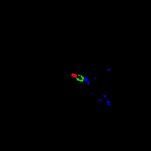

In [16]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
  return result
y=28
x=28
h=155
w=155  
imshow(rotate_image(img,30))

In [17]:
data["img"]=rotate_image(img,54)[y:y+h, x:x+w]

ValueError: Length of values (123) does not match length of index (3067)

In [23]:

# Import the necessary libraries
import cv2
import pytesseract

# Set the language to Arabic and the character set to Arabic
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
config = ('--oem 1 --psm 3 -l ara --dpi 300')

# Load the image
image = cv2.imread('WhatsApp Image 2022-12-16 at 4.12.17 PM.jpeg')
# print(image)
# Run the OCR engine on the image
text = pytesseract.image_to_string(image, config=config)

# Print the extracted text
print(text)

TesseractNotFoundError: /usr/bin/tesseract is not installed or it's not in your PATH. See README file for more information.